In [10]:
# Import the required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [11]:
# Read the data and display

diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetesDF.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1, inplace=True)

In [13]:
diabetesDF.head()

,Pregnancies,Glucose,Outcome
0,6,148,1
1,1,85,0
2,8,183,1
3,1,89,0
4,0,137,1


In [15]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Pregnancies  768 non-null    int64
 1   Glucose      768 non-null    int64
 2   Outcome      768 non-null    int64
dtypes: int64(3)
memory usage: 18.1 KB


In [16]:
# return the number of missing values
diabetesDF.isnull().sum()

Pregnancies    0
Glucose        0
Outcome        0
dtype: int64

In [17]:
corr = diabetesDF.corr()
corr

,Pregnancies,Glucose,Outcome
Pregnancies,1.000000,0.129459,0.221898
Glucose,0.129459,1.000000,0.466581
Outcome,0.221898,0.466581,1.000000


<AxesSubplot:>

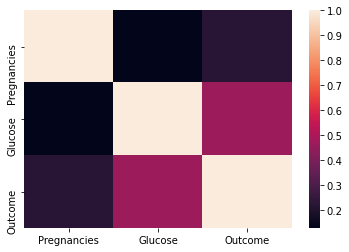

In [18]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

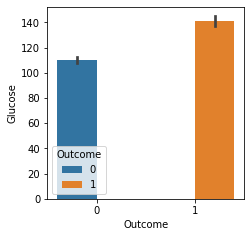

In [19]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=diabetesDF,hue="Outcome")

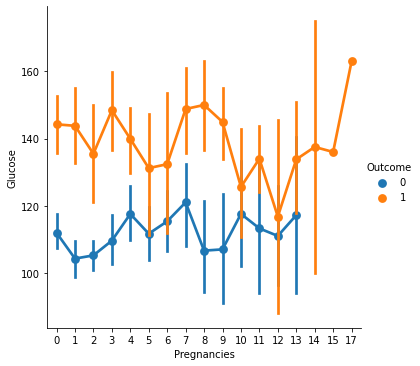

In [20]:
sns.factorplot(x='Pregnancies',y='Glucose',data=diabetesDF,hue='Outcome')

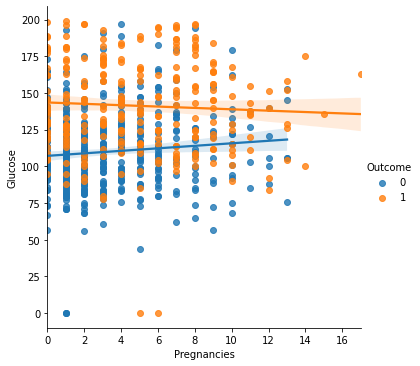

In [21]:
sns.lmplot(x='Pregnancies',y='Glucose',data=diabetesDF,hue="Outcome")

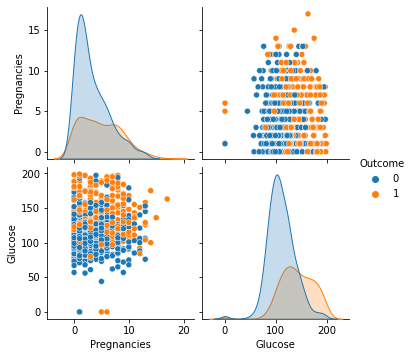

In [22]:
aa=sns.pairplot(diabetesDF,hue='Outcome')

In [23]:
# Total 768 patients record
# Using 650 data for training
# Using 100 data for testing
# Using 18 data for validation

dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

In [24]:
# Separating label and features and converting to numpy array to feed into our model
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

In [25]:
# Normalize the data 
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [26]:
# models target t as sigmoid(w0 + w1*x1 + w2*x2 + ... + wd*xd)
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData,trainLabel)
accuracy = diabetesCheck.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

accuracy =  77.0 %
